<a href="https://colab.research.google.com/github/FizzelPopBT/PB_Estadistica/blob/main/Pregunta1_Estadistica_ipypnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ¿La edad de los estudiantes difiere entre tipo de institución?

Base de datos [bd_valpo](https:///content/bd_valpo.xlsx)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_excel('bd_valpo.xlsx')

# Muestra y Poblacion

Se definió como población a todos los estudiantes de la Región de Valparaíso matriculados en instituciones de educación superior, es decir, universidades (CRUCH y privadas), institutos profesionales y centros de formación técnica.

De esta población se trabajó con una muestra de 109.198 estudiantes, correspondiente a los registros disponibles en la base de datos utilizada.

In [ ]:
muestra = df.shape[0]
muestra

109198

In [ ]:
df.head(2)

,ID,GENERO,EDAD,RANGO EDAD,AÑO INGRESO,SEMESTRE INGRESO,TIPO DE INSTITUCION,NOMBRE DE INSTITUCION,ACREDITACION INSTITUCIONAL,PERIODO DE ACREDITACION,...,NIVEL CARRERA,AREA CONOCIMIENTO,DURACION PLAN DE ESTUDIO (SEMESTRES),DURACION PROCESO TITULACION (SEMESTRES),DURACION TOTAL CARRERA (SEMESTRES),VALOR MATRICULA (PESOS),VALOR ARANCEL (PESOS),REGION SEDE,PROVINCIA SEDE,COMUNA SEDE
0,10,Femenino,24,20 a 24,2016,Primer semestre,Universidades Privadas,UNIVERSIDAD SANTO TOMAS,ACREDITADA,31/03/2021 AL 31/03/2025,...,Carreras Profesionales,Salud,10,0,10,130000,3713000,Valparaiso,Valparaiso,Vina Del Mar
1,25,Femenino,19,15 a 19,2021,Primer semestre,Institutos Profesionales,IP INSTITUTO DE ESTUDIOS BANCARIOS GUILLERMO S...,ACREDITADA,17/12/2017 AL 17/12/2022,...,Carreras Profesionales,Administracion y Comercio,8,0,8,190000,1900000,Valparaiso,Valparaiso,Vina Del Mar


# Edad

**Tablas de Frecuencia**

In [ ]:
edad = df.groupby('EDAD').size()

#Crearemos una nueva columna llamada Intervalos_edad
df['Intervalos_edad'] = pd.cut(df['EDAD'], bins = 10, include_lowest= True, precision = 0)

#Calcularemos la frecuencia absoluta
edad = df.groupby('Intervalos_edad', observed = True).size()

tabla_edad = pd.DataFrame({
    'Frecuencia absoluta': edad,
    'Frecuencia absoluta acumulada': edad.cumsum(),
    'Frecuencia relativa (%)': edad/100000 * 100,
    'Frecuencia relativa acumulada (%)': (edad/100000 * 100).cumsum()
})
round(tabla_edad,1)

,Frecuencia absoluta,Frecuencia absoluta acumulada,Frecuencia relativa (%),Frecuencia relativa acumulada (%)
Intervalos_edad,,,,
"(15.0, 22.0]",51159,51159,51.2,51.2
"(22.0, 28.0]",38065,89224,38.1,89.2
"(28.0, 35.0]",11223,100447,11.2,100.4
"(35.0, 41.0]",4390,104837,4.4,104.8
"(41.0, 47.0]",2797,107634,2.8,107.6
"(47.0, 53.0]",1046,108680,1.0,108.7
"(53.0, 59.0]",361,109041,0.4,109.0
"(59.0, 66.0]",127,109168,0.1,109.2
"(66.0, 72.0]",26,109194,0.0,109.2


**Histograma**










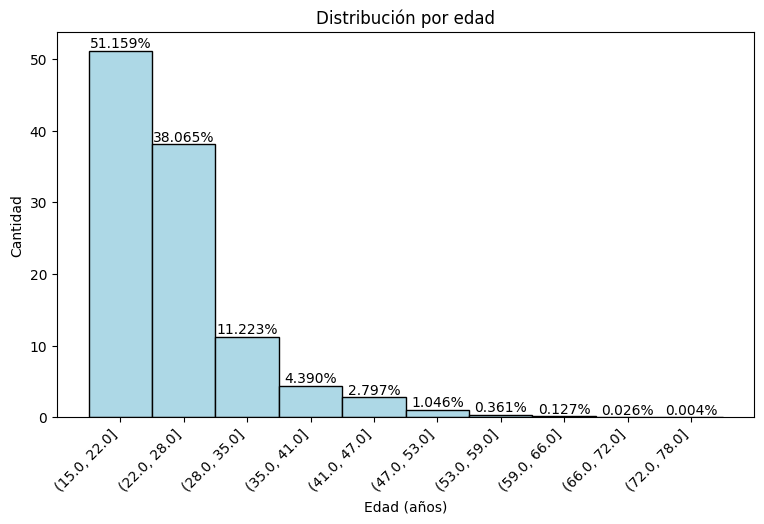

In [ ]:
#Variables
edad = tabla_edad.index
f_edad = tabla_edad['Frecuencia relativa (%)']

#Gráfico
fig, ax = plt.subplots(figsize = (9,5))
histograma_edad = ax.bar(edad.astype(str), f_edad, color = 'lightblue', edgecolor = 'black', width = 1)

#Personalización
ax.set_title('Distribución por edad')
ax.set_xlabel('Edad (años)')
ax.set_ylabel('Cantidad')
ax.bar_label(histograma_edad, fmt = '%.3f%%')
plt.xticks(rotation=45, ha = 'right')

plt.show()

**Medidas**




El análisis de la variable edad muestra que la media es de aproximadamente 23 años, la mediana 22 y la moda 19, lo que indica que la mayor concentración de estudiantes corresponde a jóvenes que ingresan a la educación superior inmediatamente después de la enseñanza media. La mayor frecuencia se da en los 19 años, mientras que la menor frecuencia corresponde a edades extremas como los 16 y los 78 años.

El rango de distribución es de 62 años, lo que refleja la presencia tanto de estudiantes adolescentes como de adultos mayores dentro del sistema. La desviación estándar cercana a 7 años confirma que, si bien la mayoría de los estudiantes son jóvenes, existe dispersión en la edad.

Al analizar los percentiles, se observa que el 25% de los estudiantes tiene 19 años o menos, el 50% tiene hasta 22 y el 75% no supera los 25 años. Esto confirma que la mayor concentración de la población se ubica en el grupo de 19 a 25 años, aunque existe un segmento más reducido de estudiantes adultos que amplía el rango etario de la muestra.

In [ ]:
# Medidas

media_edad = df['EDAD'].mean()
mediana_edad = df['EDAD'].median()
moda_edad = df['EDAD'].mode()
std_edad = df['EDAD'].std()

print(f'Promedio: {media_edad:.1f}\nMediana: {mediana_edad}\nModa: {moda_edad[0]} \nstd: {std_edad:.1f}')

Promedio: 24.7
Mediana: 23.0
Moda: 19 
std: 6.5


In [ ]:
#Valores

maximo = df['EDAD'].max()
minimo = df['EDAD'].min()
rango = maximo - minimo

print(f'Mayor edad: {maximo}\nMenor edad: {minimo}')
print(f"Rango: {rango}")

Mayor edad: 78
Menor edad: 16
Rango: 62


In [ ]:
# Percentiles
p25 = df['EDAD'].quantile(0.25)
p50 = df['EDAD'].quantile(0.50)
p75 = df['EDAD'].quantile(0.75)

print(f"p 25: {p25}")
print(f"p 50 (mediana): {p50}")
print(f"p 75: {p75}")

p 25: 21.0
p 50 (mediana): 23.0
p 75: 26.0


# Tipo de Institucion

**Tablas de Frecuencia**

In [ ]:
tipo_institucion = df.groupby('TIPO DE INSTITUCION').size()
tabla_institucion = pd.DataFrame({
    'Frecuencia Absoluta': tipo_institucion,
    'Frecuencia Relativa %': tipo_institucion/muestra*100
})

round(tabla_institucion,1)

,Frecuencia Absoluta,Frecuencia Relativa %
TIPO DE INSTITUCION,,
Centros de Formacion Tecnica,10839,9.9
Institutos Profesionales,28172,25.8
Universidades CRUCH,43702,40.0
Universidades Privadas,26485,24.3


**Graficoss circular y de barra**





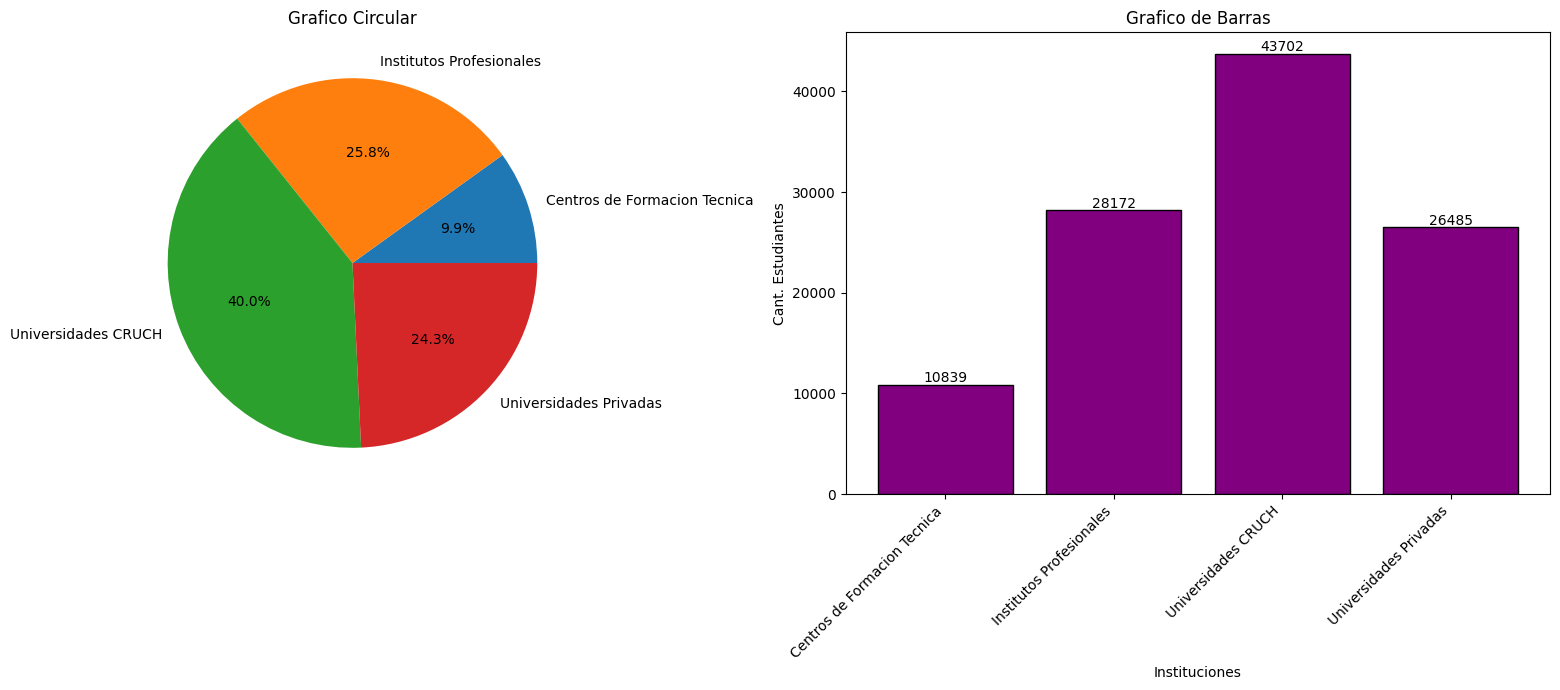

In [ ]:
#Variables
tipo_institucion = tabla_institucion.index
h_cont = tabla_institucion['Frecuencia Relativa %']
f_cont = tabla_institucion['Frecuencia Absoluta']

#Los gráficos
fig,(ax1, ax2) = plt.subplots(1, 2, figsize = (20,6))

#Gráfico circular
circular_cont = ax1.pie(h_cont, labels = tipo_institucion, autopct= '%.1f%%')

#Gráfico de barras
barras_cont = ax2.bar(tipo_institucion, f_cont, color = 'purple', edgecolor = 'black')

#Personalización
ax1.set_title('Grafico Circular')
ax2.set_title('Grafico de Barras')
ax2.set_xlabel('Instituciones')
ax2.set_ylabel('Cant. Estudiantes')
ax2.bar_label(barras_cont)
plt.xticks(rotation=45, ha = 'right')

plt.show()

# Respuesta

**Relacion**

In [ ]:
df_relacion = df.groupby(['Intervalos_edad','TIPO DE INSTITUCION'],observed=True ).size().unstack(fill_value=0)
df_relacion

TIPO DE INSTITUCION,Centros de Formacion Tecnica,Institutos Profesionales,Universidades CRUCH,Universidades Privadas
Intervalos_edad,,,,
"(15.0, 22.0]",4031,12708,23510,10910
"(22.0, 28.0]",2965,9225,15893,9982
"(28.0, 35.0]",1843,3566,2746,3068
"(35.0, 41.0]",950,1392,812,1236
"(41.0, 47.0]",613,856,481,847
"(47.0, 53.0]",278,307,167,294
"(53.0, 59.0]",110,87,62,102
"(59.0, 66.0]",39,28,24,36
"(66.0, 72.0]",9,2,6,9


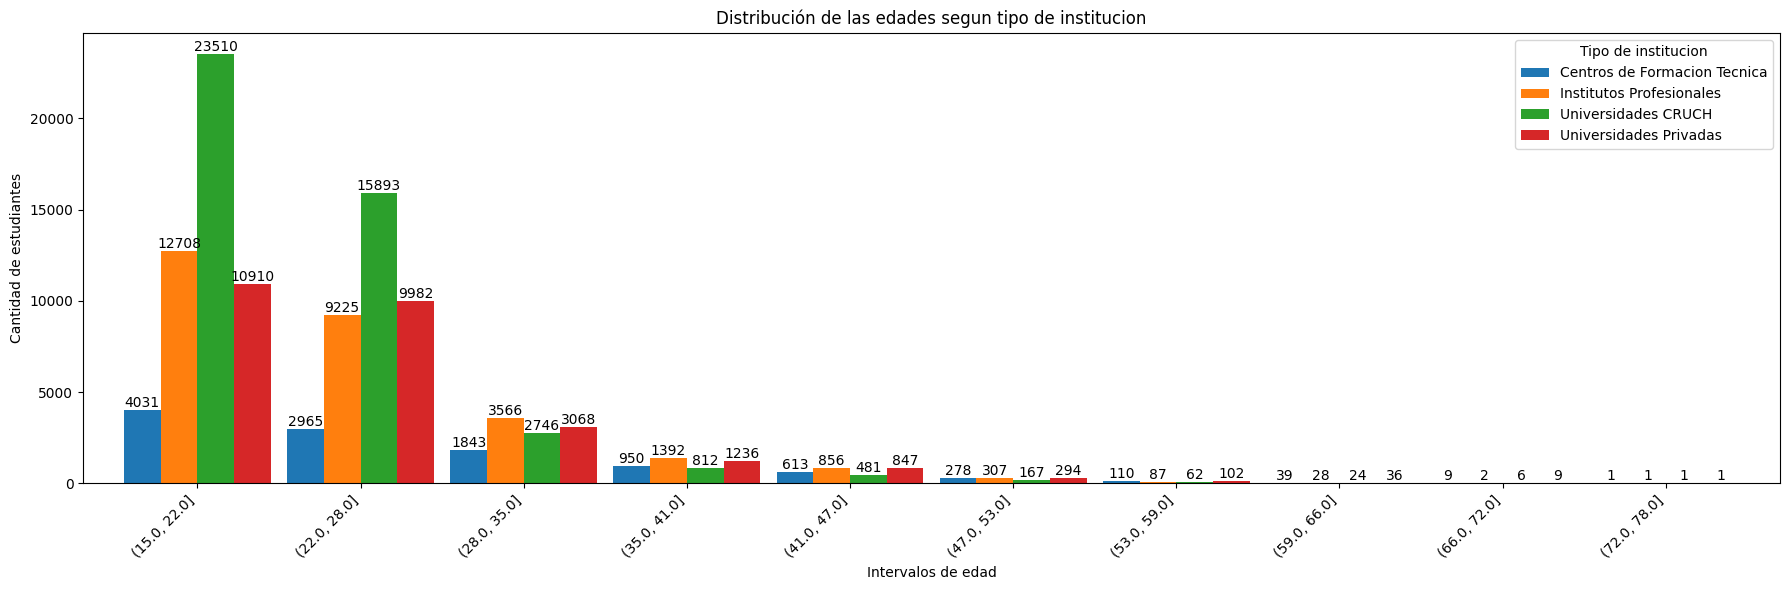

In [ ]:
fig, ax = plt.subplots(figsize=(18, 6))

df_relacion.plot(kind='bar', ax=ax, width=0.9)

for container in ax.containers:
    ax.bar_label(container, fmt='%d')


ax.set_title('Distribución de las edades segun tipo de institucion')
ax.set_xlabel('Intervalos de edad')
ax.set_ylabel('Cantidad de estudiantes')
ax.tick_params(axis='x', rotation=0)
ax.legend(title='Tipo de institucion')
plt.xticks(rotation=45, ha = 'right')

plt.tight_layout()
plt.show()

**Conclucion**

El análisis revela que la mayoría de los estudiantes de educación superior son jóvenes, aunque existe una presencia significativa de adultos en distintos rangos de edad. La distribución etaria varía según el tipo de institución, de manera que algunos establecimientos concentran principalmente a estudiantes jóvenes recién egresados de la educación media, mientras que otros incorporan una mayor diversidad de edades. Esto evidencia que la edad de los estudiantes difiere según el tipo de institución, reflejando distintos perfiles de ingreso y trayectorias educativas dentro del sistema.